# Monitor any Llama Index RAG pipeline with Literal AI

Let's build a typical Q&A application with LLamaIndex and monitor it with Literal AI. 

We start off with the [Q&A example by LlamaIndex](https://docs.llamaindex.ai/en/stable/understanding/putting_it_all_together/q_and_a/)

- [Set up monitoring](#setup)
- [Q&A example from LlamaIndex](#llama-index-docs)
- [Build a Thread application](#build-thread-app)
- [Explore Threads](#explore-threads)

<a id="setup"></a>
## Set up monitoring

We start by instantiating a Literal client and setting a callback manager in our LLamaIndex settings.  
This sets up monitoring on LlamaIndex APIs.

In [10]:
import os

from literalai import LiteralClient

from llama_index.core import Settings
from llama_index.core.callbacks import CallbackManager

# Copy the .env.example to a .env to load environment variables.
from dotenv import load_dotenv
load_dotenv()

# To get a Literal API key, check https://docs.getliteral.ai/get-started/installation#how-to-get-my-api-key
literal_client = LiteralClient(api_key=os.getenv("LITERAL_API_KEY"))

# Set a callback on LlamaIndex settings
Settings.callback_manager = CallbackManager([literal_client.llama_index_callback()])

<a id="llama-index-docs"></a>
## Create Llama index from documents

We can then load documents from a directory and create a Llama index and query engine.

In [11]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

documents = SimpleDirectoryReader("docs").load_data()
index = VectorStoreIndex.from_documents(documents)

query_engine = index.as_query_engine()

<a id="build-thread-app"></a>
## Build a Thread application

Finally, we build a simple Q&A application which we wrap in Literal threads.

In [12]:
@literal_client.thread(name="Q&A Thread")
def rag_thread(query):
    return query_engine.query(query)


In [13]:
rag_thread("What's Literal?").response

'Literal is a tool that allows developers to monitor and visualize the flow of requests through a distributed system. It provides structured logging and tool orchestration capabilities, enabling developers to gain insights into the performance of their system, debug issues, and understand the behavior of complex, interconnected services. By using Literal, developers can track the journey of requests as they interact with various components within a distributed system.'

<a id="explore-threads"></a>
## Explore Threads

All calls to `rag_thread` above will be wrapped in a Thread and you can browse them all from the "Observability" > "Threads" table:

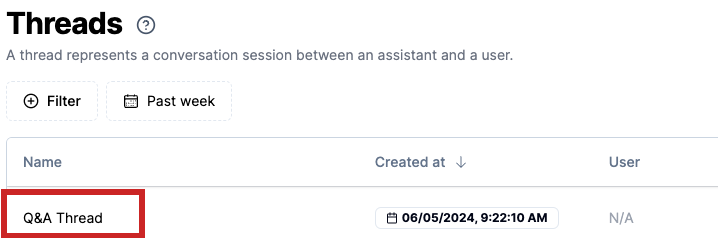

Clicking on a specific Thread, we can explore the inner workings of LlamaIndex and the steps involved to generate the response:

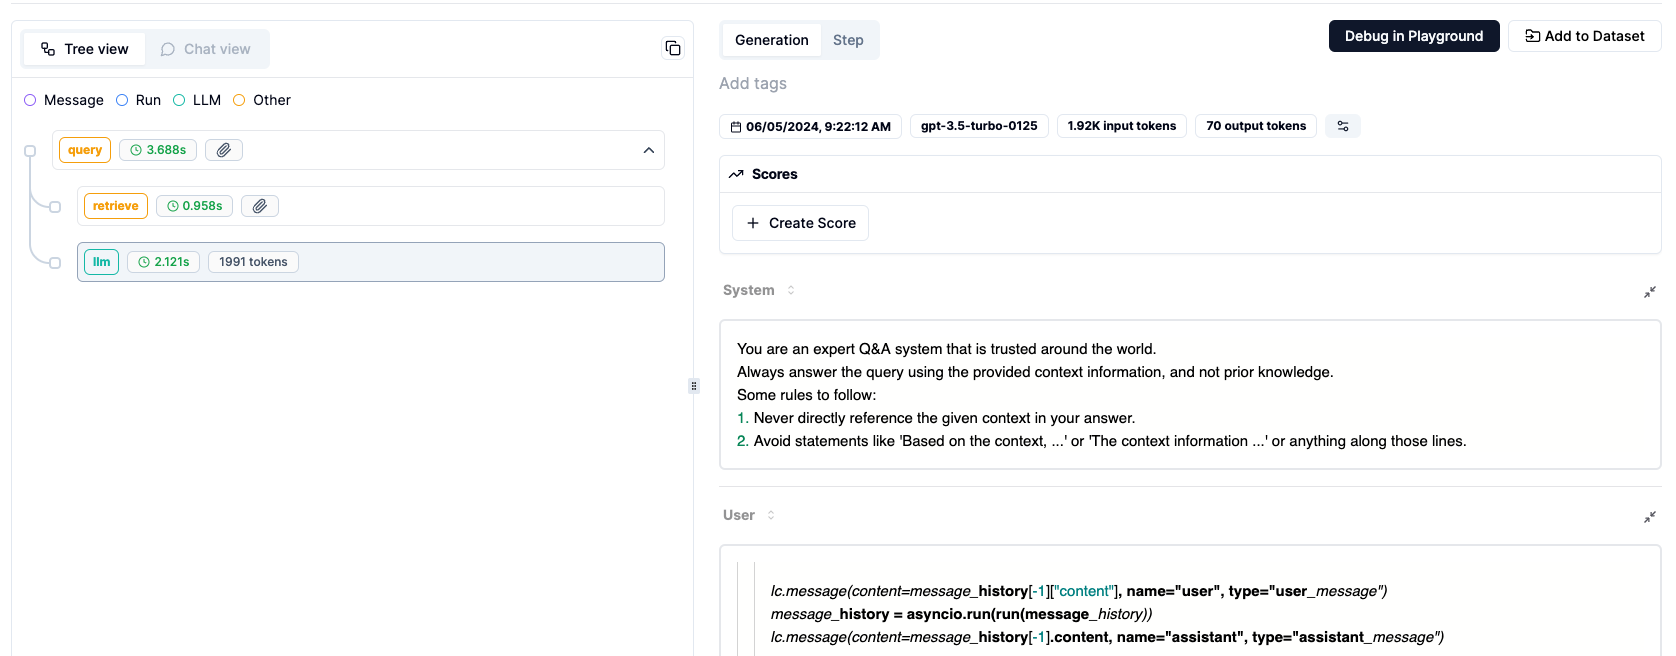